# Графическая интерпретация условий ККТ для нахождения условного локального минимума

Цель: научиться графически представлять выпуклость множества и условий теоремы Каруша-Куна-Такера, уметь обосновывать регулярность задачи, находить по графику целевой функции и ограничений точки подозрительные на локальный минимум и уметь доказать наличие локального минимума в них.

## Постановка задачи

Требуется найти $\min_{(x, y) \in D} Q(x, y)$, $D$ = $\{-2.5 \leq x \leq 2, -2 \leq y \leq 2, g_i(x, y) \leq 0\}$

$Q(x, y) = 50 (sin(3x) - y)^2 + 9x^2$

$g_1(x, y) = y + x - 0.5 \leq 0$

$g_1(x, y) = y - x - 0.5 \leq 0$

$g_1(x, y) = y^3 - x + 1 \leq 0$

Задачи:

- Построить график линий равного уровня целевой функции $Q(x, y)$, построить вид допустимого множества $D$.

- Определить выпукла ли минимизируемая функиця, выпукло ли допустимое множество и регулярно ли оно.

- Отметить на графике красным точки, подходящие под условия ККТ, в которых локального минимума нет, и зелёным - точки, в которых он есть. Указать направления градиентов функций условий и антиградиента целевой функции.

## Теоретическая справка

### Условия Каруша-Куна-Такера

Решение задачи нахождения минимума функции $Q(x)$ при ограничениях $g_i(x) \leq 0$ равносильно нахождению минимума функции Лагранжа:

$$L(x, \lambda_0, \lambda) = \lambda_0 Q(x) + \sum_i \lambda_i g_i(x) $$

Пусть $x^*$ - т. локального минимума, $Q, g_i \in C^1(U_\epsilon(x^*))$, тогда

1) $x^* \in D$ - допустимость
2) $(\lambda_0^*, \lambda^*) \neq 0$ - нетривиальность
3) $-\lambda_0^* \nabla Q(x^*) = \sum_i \lambda_i^* \nabla g_i(x^*)$ - разложимость
4) $\lambda_i^* \geq 0, \lambda_0^* \geq 0$ - неотрицательность
5) $\lambda_i^* g_i(x^*) = 0$ - дополняющая нежёсткость

### Регулярность множества

Определение. Допустимое множество $D$ *регулярно в точке* $x^0 \in D$, если для любой функции $Q$ из рассматриваемого класса, имеющей в точке $x^0$ условный локальный минимум на $D$, условия оптимальности могли выполняться при $\lambda_0^* \neq 0$.

Допустимое множество $D$ регулярно в целом, если оно регулярно в каждой своей точке.

Достаточное условие регулярности для класса невыпуклых достаточно гладких задач: если в точке $x^*$ активны (обращаются в ноль) ограничения $g_r(x^*) = 0$ и система векторов {$\nabla g_r(x^*)$} линейно независима, то допустимое множество $D$ регулярно в точке $x^*$.

- Из регулярности следует, что для нахождения локального условного минимума можно положить $\lambda_0^* = 1$.

## Программная реализация

Для визуализации зададим сетку на целевом множестве и воспользуемся функциями contourf и contour библиотеки matplotlib для отображения линий равного уровня.

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install sympy

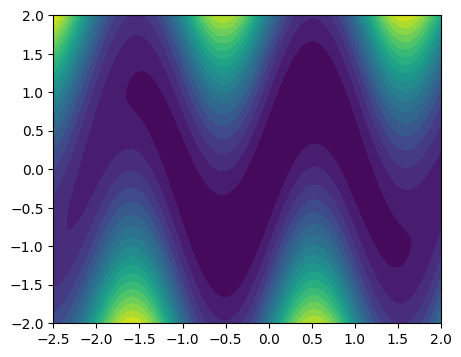

In [136]:
import matplotlib.pyplot as plt
import numpy as np

n = 80
x1, x2 = (-2.5, 2.0) 
y1, y2 = (-2.0, 2.0) 

def Q(x, y):
    return 50*(np.sin(3*x) - y)**2 + 9*x*x

X, Y = np.meshgrid(np.linspace(x1, x2, n), np.linspace(y1, y2, n))
Z = Q(X, Y)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

CS = ax.contourf(X, Y, Z, levels=20, cmap='viridis') # f - filled
plt.show()

Целевая функция невыпукла, поскольку, взяв 2 точки на линии уровня и соединив их отрезком, мы можем получить отрезок, не лежащий полностью по одну сторону от линии, что является необходимым условием для выпуклых функций.

Отобразим график линий уровня ограничений, указав явно в параметре levels массив значений уровня.

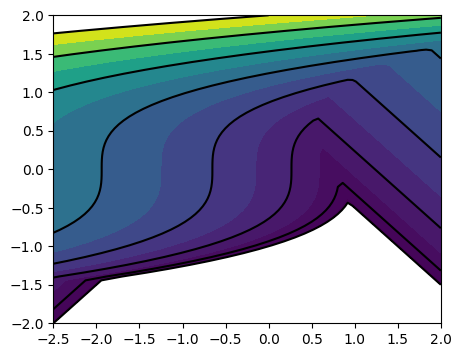

In [137]:
# x/y = None means that we take g(x, y) = 0
def g1(x, y=None):
    if y is None:
        return -x + 0.5
    return y + x - 0.5
def g2(x, y=None):
    if y is None:
        return x + 0.5
    return y - x - 0.5
def g3(x, y):
    if x is None:
        return y*y*y + 1
    return y*y*y - x + 1

def G(x, y):
    return np.max([g1(x, y), g2(x, y), g3(x, y)], axis=0)

Z = G(X, Y)

fig_, ax_ = plt.subplots(1, 1, figsize=(5, 4))

CS = ax_.contourf(X, Y, Z, levels=np.linspace(0, 3, 15)**2, cmap='viridis') # f - filled
CS2 = ax_.contour(CS, levels=CS.levels[::2], colors='black')
plt.show()

Аналогично как и для целевой функции можно показать, что допустимое множество невыпукло.

Допустимое множество регулярно внутри по определению. На границе множества градиенты образуют линейно независимую систему - условие регулярности выполняется на границе. Допустимое множество регулярно всюду.

### Выделим область допустимых значений на графике целевой функции

При помощи пакета символьных вычислений sympy найдём аналитически углы целевого множества приравнивая уравнения границ друг к другу.

-1.9311271443936895 -1.4311271443936895
0.9238537990697833 -0.42385379906978327


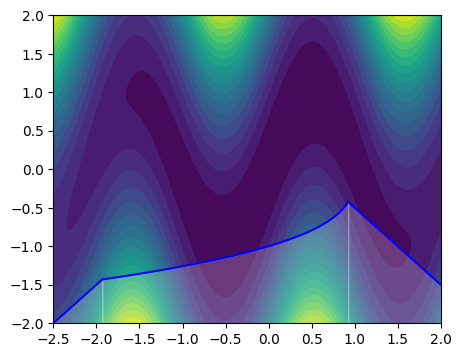

In [138]:
import sympy as sym
from sympy import solve, diff, nsolve

x = sym.Symbol('x')
y = sym.Symbol('y')

def Corner(g_1, g_2):
    x_, y_ = solve([g_1(x, y), g_2(x, y)], [x, y], dict=False)[0]
    return (float(x_), float(y_)) # convert sympy expression to float
    
x_1, y_1 = Corner(g2, g3)
print(x_1, y_1)

x_2, y_2 = Corner(g1, g3)
print(x_2, y_2)

X1 = np.linspace(x1, x_1, 30)
ax.plot([x1, x_1], [g2(x1), y_1], c='b')
ax.fill_between(X1, y1=y1, y2=g2(X1), alpha=0.2, color='white')

Y2 = np.linspace(y_1, y_2, 30)
ax.plot(g3(None, Y2), Y2, c='b')
ax.fill_between(g3(None, Y2), y1=y1, y2=Y2, alpha=0.2, color='white')

X3 = np.linspace(x_2, x2, 30)
ax.plot([x_2, x2], [y_2, g1(x2)], c='b')
ax.fill_between(X3, y1=y1, y2=g1(X3), alpha=0.2, color='white')

fig

### Отметим прогнозные точки подходящие под условия ККТ

Проверим угловые точки на выполнение условий ККТ

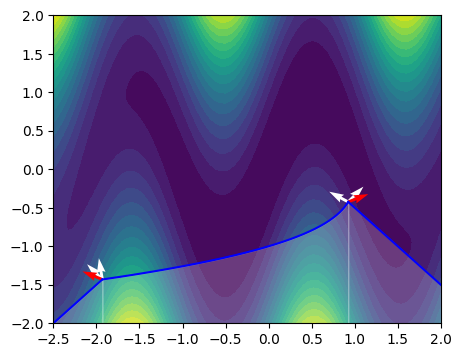

In [139]:
def _Q(x, y): # for symbolic calculus
    return 50*(sym.sin(3*x) - y)**2 + 9*x*x

def draw_grad_at(f, _x, _y, color='white'):
    dfdx = diff(f, x)
    u = float( dfdx.subs([(x, _x), (y, _y)]) )
    dfdy = diff(f, y)
    v = float( dfdy.subs([(x, _x), (y, _y)]) )

    ax.quiver(_x, _y, u, v, color=color)
    return
    
draw_grad_at(g2(x, y), x_1, y_1)
draw_grad_at(g3(x, y), x_1, y_1)
draw_grad_at(g3(x, y), x_2, y_2)
draw_grad_at(g1(x, y), x_2, y_2)

draw_grad_at(-_Q(x, y), x_1, y_1, color='red')
draw_grad_at(-_Q(x, y), x_2, y_2, color='red')

fig

Видно, что в угловых точках вектор антиградиента $-\nabla Q$ (отмечен красной стрелкой) лежит вне конуса градиентов условий (отмечены белыми стрелками). Следовательно, не выполняется условие разложимости при $\lambda \geq 0$.

### Поиск прогнозных точек

Зная, что в прогнозной точке активно (обращается в ноль) ровно одно из ограничений $g_i(x, y)$, можно из условий ККТ записать систему для их поиска подставляя каждое ограничение по очереди.

Для нахождения решения систем воспользуемся численными алгоритмами, предоставляемыми sympy (nsolve).

x = -1.604  y = -1.376  l = 41.753
Hessian L is positive-definite? - False
x = -0.439  y = -1.129  l = 4.21
Hessian L is positive-definite? - True
x = 0.472  y = -0.808  l = 91.652
Hessian L is positive-definite? - False
x = 1.261  y = -0.761  l = 16.204
Hessian L is positive-definite? - True


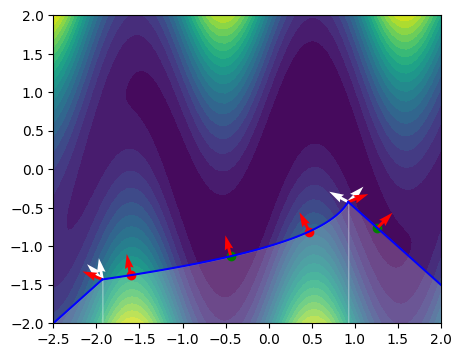

In [140]:
l = sym.Symbol('l')
levels = []

def sign_Hess_L(f, _x, _y, _l):
    fx, fy = diff(f, x), diff(f, y)
    fxx = diff(fx, x).subs([(x, _x), (y, _y), (l, _l)])
    fxy = diff(fx, y).subs([(x, _x), (y, _y), (l, _l)])
    fyy = diff(fy, y).subs([(x, _x), (y, _y), (l, _l)])

    d1 = float(fxx)
    d2 = float(fxx * fyy - 2 * fxy)
    return (d1 > 0 and d2 > 0)

def Find(g, _x, _y, color='white'):
    L = _Q(x, y) + l * g(x, y)
    grad_L = [diff(L, x), diff(L, y)]

    res = nsolve((grad_L[0], grad_L[1], g(x, y)),
                 (x, y, l),
                 (_x, _y, 1))
    x_, y_, l_ = [float(res[0]), float(res[1]), float(res[2])]

    ax.scatter(x_, y_, color=color)
    draw_grad_at(-_Q(x, y), x_, y_, color='red')
    levels.append(Q(x_, y_))

    print('x =', round(x_, 3), ' y =', round(y_, 3), ' l =', round(l_, 3))
    print('Hessian L is positive-definite? -', sign_Hess_L(L, x_, y_, l_))
    return [x_, y_, l_]

# Find(g2, -2.5, -2.0) # behind the borders
Find(g3, -1.5, -1.5, 'red')
Find(g3, -0.5, -1.0, 'green')
Find(g3, 0.5, -1.0, 'red')
Find(g1, 1.5, -1.0, 'green')

fig

### Достаточное условие наличия локального минимума

Визуально определить какие из точек можно по линиям равного уровня, проходящих через них. Если двигаясь по линии вы возвращаетесь в допустимое множество, то значит в окрестности есть линии меньшего уровня, принадлежащие допустимому множество, и данная точка не является локальным минимумом.

Аналитически проверить через достаточное условие 2-го порядка в точке $x^*$:

1) Наличие активных ограничений $g_r(x)$
2) Система {$\nabla g_r(x^*)$} линейно независима
3) $\lambda^*_r > 0$
4) число активны ограничений меньше размерности задачи
5) $\forall d \neq 0 : d^T \nabla g_r(x^*) = 0 : d^*T \nabla^2_{xx} L(x^*, \lambda_0^*, \lambda^*) d > 0$.

Для выполнения 5-го условия достаточно, чтобы гессиан в точке был положительно определён (можно воспользоваться критерием Сильвестра).